In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft
import scipy.signal as signal
from math import log10
from scipy.signal import butter, lfilter
from scipy.stats import linregress
from statistics import mean

In [2]:
pip install biosignalsnotebooks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 33.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.9 MB/s eta 0:00:00
  Created wheel for libmagic: filename=libmagic-1.0-py3-none-any.whl size=4269 sha256=74e935cfe3175d74e4b33691510623c2ef3af37e605ea5ad0bf4d1170c008aeb
  Stored in directory: /root/.cache/pip/wheels/31/ce/d8/099fbd4dbfa5da5596a39eee8a17d2e1bcc29006c07d3563b7
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=a5fdfbbcbae1431d49cb2983db31072a8f324fb2c743a1e055f42c7b1126b086
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built libmagic wget


In [3]:
import biosignalsnotebooks as bsnb

## Importación de la señal

Text(0.5, 1.0, 'Señal EMG de Supinación en el Paciente 1')

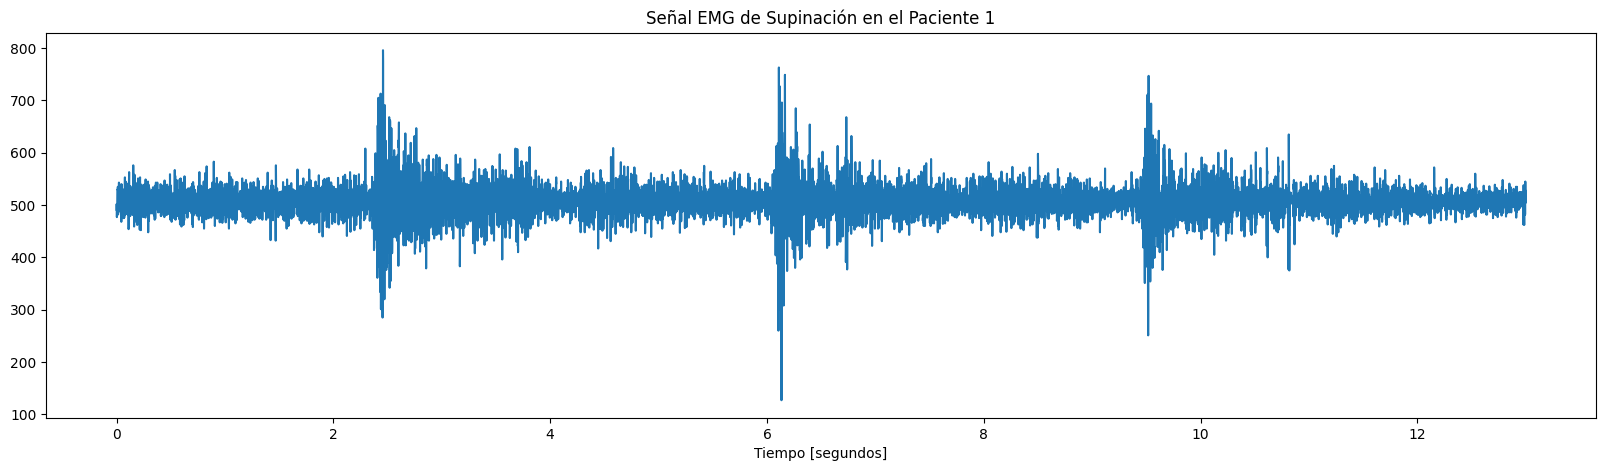

In [4]:
array1 = np.genfromtxt("p1_supinacion.txt",   skip_header=1, delimiter="\t")
Fs = 1000
Ts = 1/Fs
señal = array1[:,-2]
señalP = señal[3000:16000]
n = len(señalP)
t = np.arange(0,0+n,1)*Ts
plt.figure(figsize=(20,5))
plt.plot(t, señalP)
plt.xlabel("Tiempo [segundos]")
plt.title("Señal EMG de Supinación en el Paciente 1")

## Conversión a mV

Text(0.5, 1.0, 'Señal EMG de Supinación en el Paciente 1')

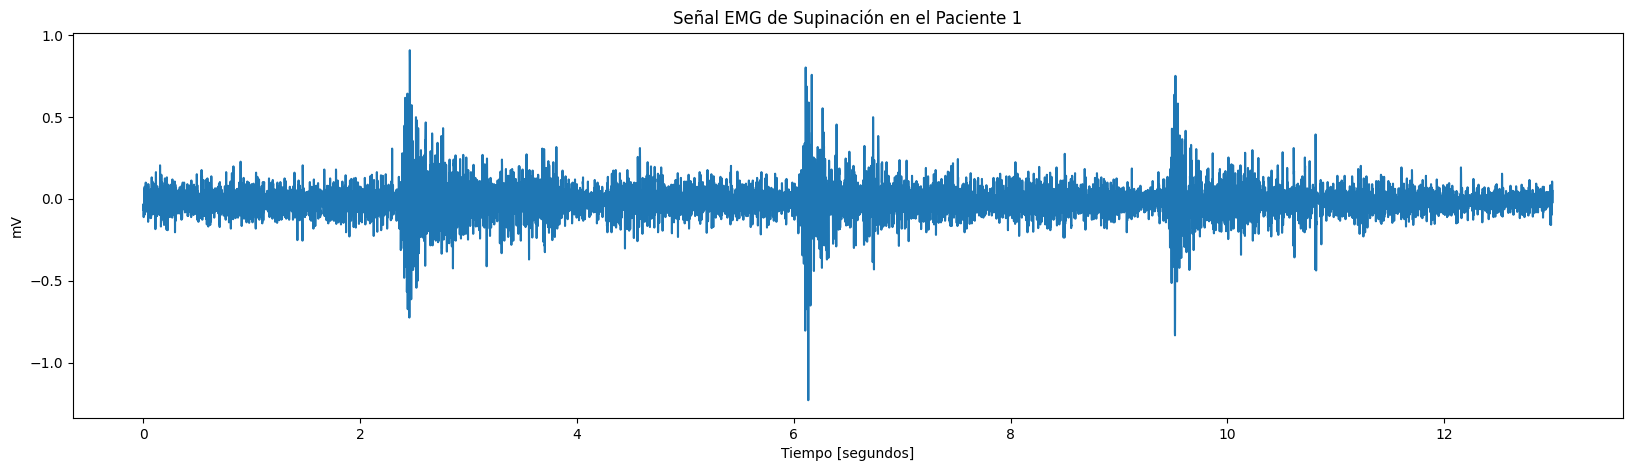

In [5]:
vcc  = 3300 #mV
gain = 1009
resolution = 10
señal = array1[:,-2]
nseñal = (((señalP / 2**resolution) - 0.5) * vcc) / gain
plt.figure(figsize=(20,5))
plt.plot(t, nseñal)
plt.ylabel("mV")
plt.xlabel("Tiempo [segundos]")
plt.title("Señal EMG de Supinación en el Paciente 1")

## FILTRADO SE LA SEÑAL


In [6]:
# Eliminacion de la linea de Base

#average = sum(señalP)/len(señalP)
#pre_pro_signal = señalP - average
pre_pro_signal2 = nseñal - np.average(nseñal)
pre_pro_signal2

array([-0.05247596, -0.01734294, -0.07802725, ...,  0.04653528,
       -0.01095511,  0.06250484])

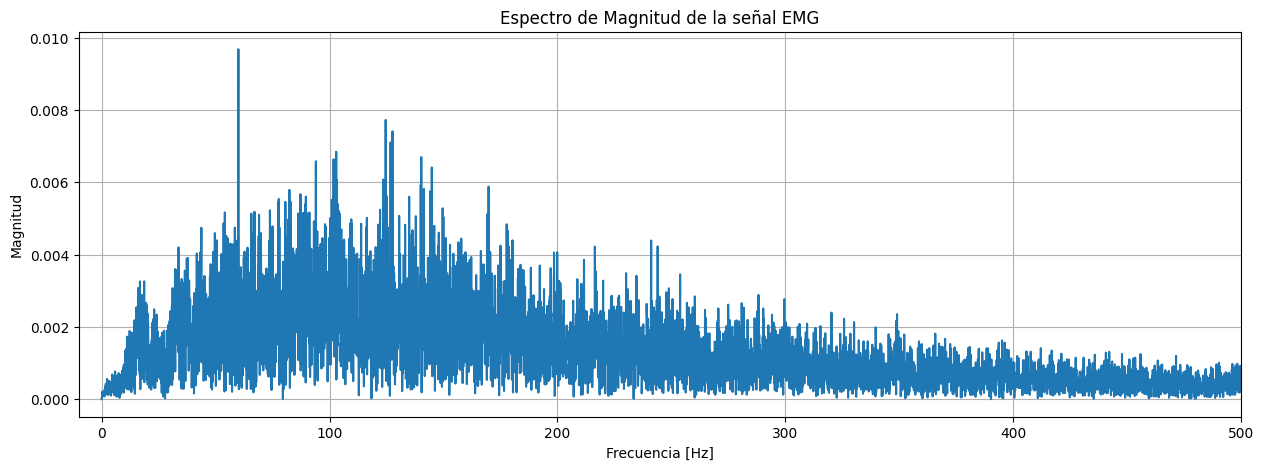

In [7]:
# Analizar el Fourier
emg_senal = pre_pro_signal2
Fs = 1000
Ts = 1/Fs
N = len(emg_senal)
yf = fft(emg_senal)
xf = np.linspace(0.0, 1.0/(2.0*Ts), N//2)
plt.figure(figsize=(15,5))
ejy = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, ejy )
plt.grid()
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.title("Espectro de Magnitud de la señal EMG")
plt.xlim(-10,500)
plt.show()

Text(0.5, 1.0, 'Señal de Supinación del Paciente 1 filtrada mediante Filtro Notch')

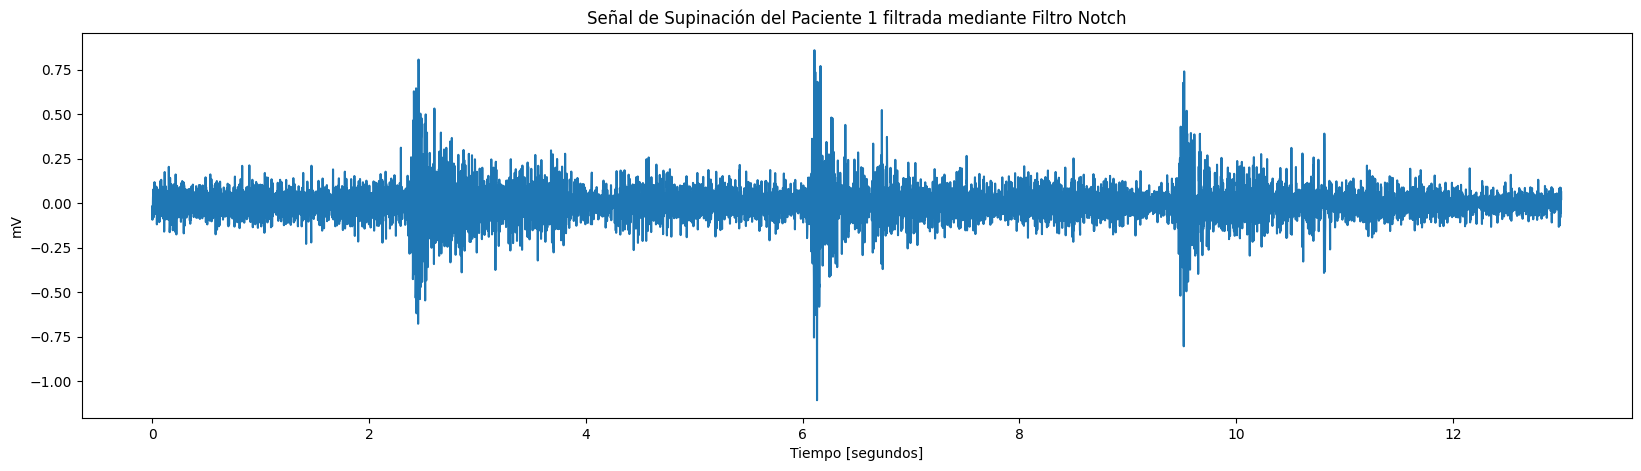

In [8]:
from scipy.signal import iirnotch, lfilter
f0 = 60.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, Fs)
y = lfilter(b, a, emg_senal)

f0 = 245.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, Fs)
y = lfilter(b, a, y)

señalP = y
n = len(señalP)
plt.figure(figsize=(20,5))
plt.plot(t, señalP)
plt.ylabel("mV")
plt.xlabel("Tiempo [segundos]")
plt.title("Señal de Supinación del Paciente 1 filtrada mediante Filtro Notch")

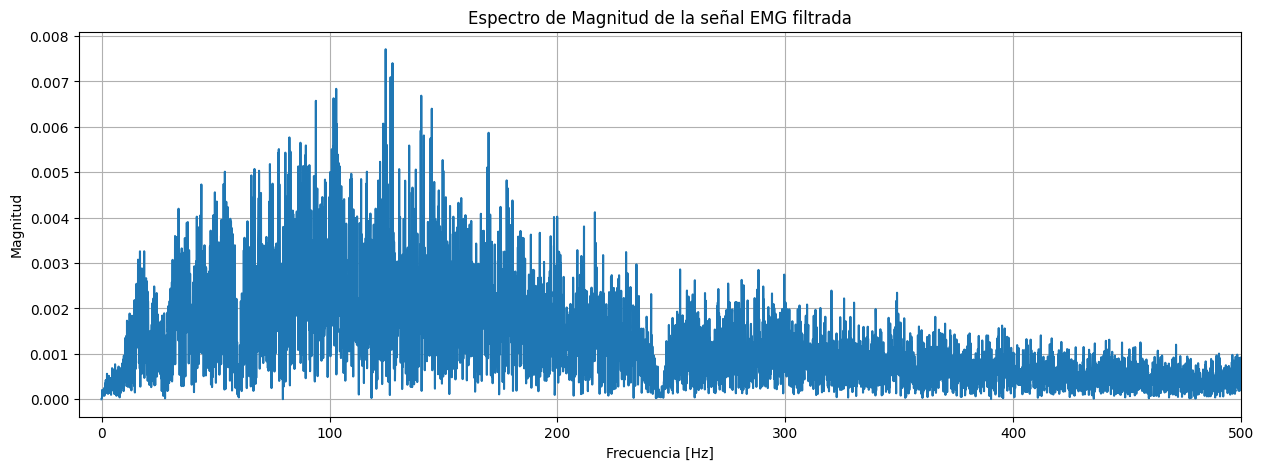

In [9]:
emg_senal = y
Fs = 1000
Ts = 1/Fs
N = len(emg_senal)
yf = fft(emg_senal)
xf = np.linspace(0.0, 1.0/(2.0*Ts), N//2)
plt.figure(figsize=(15,5))
ejy = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, ejy )
plt.grid()
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.title("Espectro de Magnitud de la señal EMG filtrada")
plt.xlim(-10,500)
plt.show()

Text(0.5, 1.0, 'Señal de Supinación del Paciente 1 filtrada mediante Filtro Pasabanda')

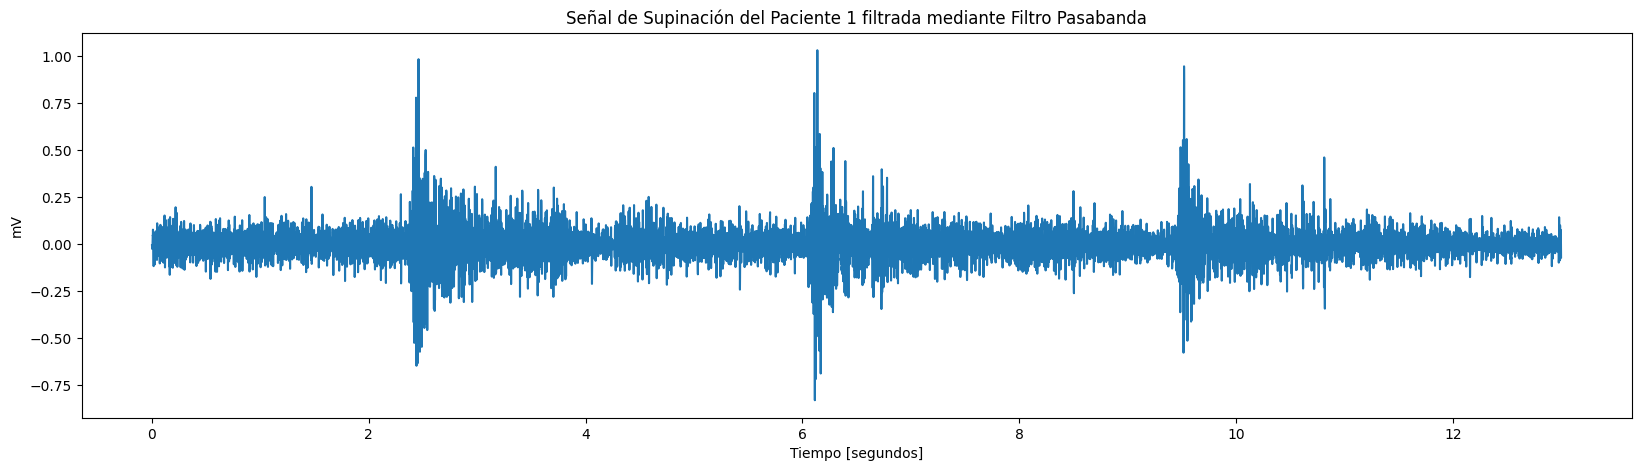

In [10]:
# Filtrado

low_cutoff = 20
high_cutoff = 350

pre_pro_signal = bsnb.aux_functions._butter_bandpass_filter(y, low_cutoff, high_cutoff, Fs)

señalP = pre_pro_signal
n = len(señalP)
t = np.arange(0,0+n,1)*Ts
plt.figure(figsize=(20,5))
plt.plot(t, señalP)
plt.ylabel("mV")
plt.xlabel("Tiempo [segundos]")
plt.title("Señal de Supinación del Paciente 1 filtrada mediante Filtro Pasabanda")

In [11]:
señalU = señalP
data = {'señalU': señalU}
np.savez('supin1.npz',**data)

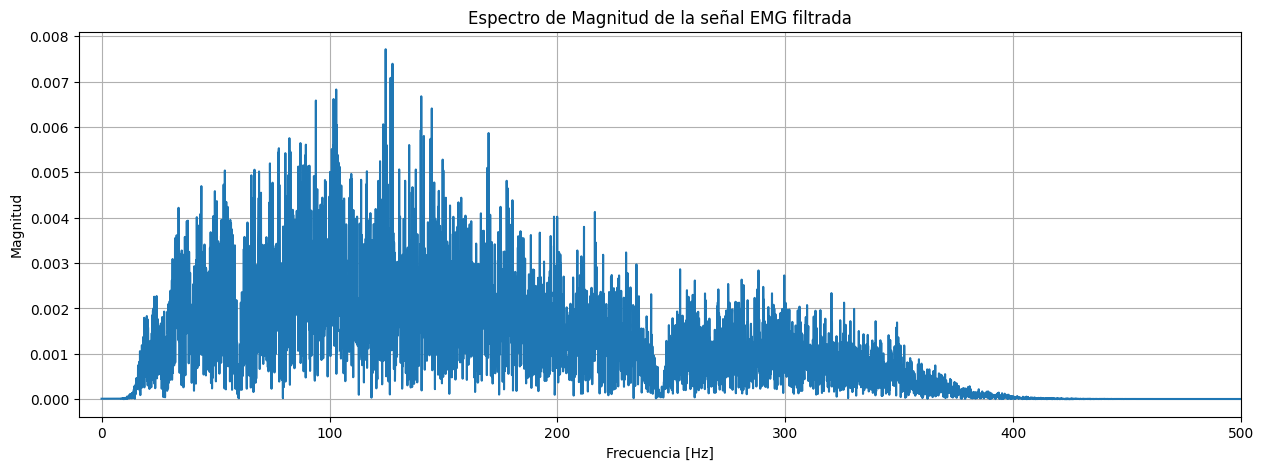

In [ ]:
# Analizar el Fourier
emg_senal = pre_pro_signal
Fs = 1000
Ts = 1/Fs
N = len(emg_senal)
yf = fft(emg_senal)
xf = np.linspace(0.0, 1.0/(2.0*Ts), N//2)
plt.figure(figsize=(15,5))
ejy = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, ejy )
plt.grid()
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.title("Espectro de Magnitud de la señal EMG filtrada")
plt.xlim(-10,500)
plt.show()

## EXTRACCION DE CARACTERISTICAS

In [ ]:
# Deteccion de Activación
burst_begin, burst_end = bsnb.detect_emg_activations(señalP, Fs, smooth_level = 20, threshold_level = 16, time_units = True, plot_result = True)[:2]


In [ ]:
# Maximo
max_sample_value = max(señalP)
max_sample_value

1.0319239676723597

In [ ]:
# Minimo
min_sample_value = min(señalP)
min_sample_value

-0.8292180303053851

In [ ]:
# Promedio
avg_sample_value = np.average(señalP)
avg_sample_value

5.825238020404137e-06

In [ ]:
# Desviacion estandar
std_sample_value = np.std(señalP)
std_sample_value

0.0901814483690921

In [ ]:
time_param_dict = {"Maximum EMG": max_sample_value, "Minimum EMG": min_sample_value, "Average EMG": avg_sample_value, "Standard Deviation EMG": std_sample_value}
time_param_dict

{'Maximum EMG': 1.0319239676723597,
 'Minimum EMG': -0.8292180303053851,
 'Average EMG': 5.825238020404137e-06,
 'Standard Deviation EMG': 0.0901814483690921}

In [ ]:
# Root Mean Square
from statistics import sqrt

rms = sqrt((sum(señalP*señalP))/len(señalP))
rms

0.09018144855723124

In [ ]:
# Area bajo la curva
from scipy import integrate
area = integrate.cumtrapz(señalP)
area

array([-0.01250643, -0.03338343, -0.05283493, ...,  0.0964682 ,
        0.14051235,  0.11249219])

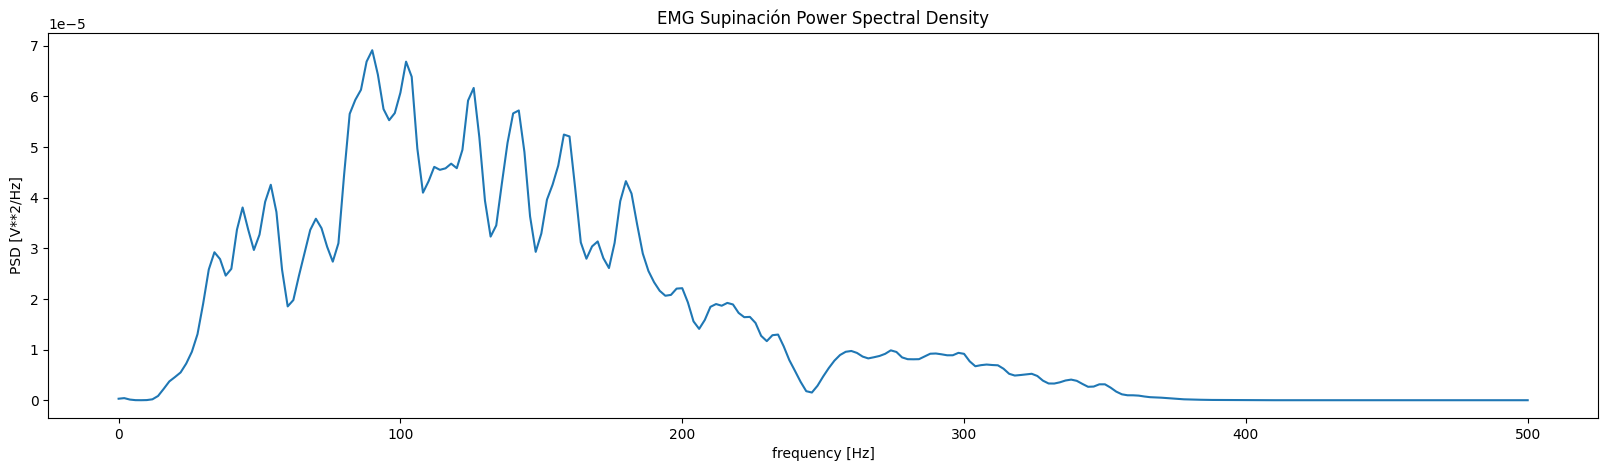

In [ ]:
# Potencia espectral de la señal
from scipy import signal
f, P = signal.welch(señalP, fs = Fs, window = 'hann', noverlap = 0, nfft = int(500.))
plt.figure(figsize=(20,5))
plt.plot(f, P)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.title("EMG Supinación Power Spectral Density")
plt.show()

In [ ]:
# potencia total
area_freq = integrate.cumtrapz(P, f, initial = 0)
total_power = area_freq[-1]
total_power

0.008234294695940808

In [ ]:
# Frecuencia Media

median_freq = f[np.where(area_freq >= total_power / 2)[0][0]]
median_freq

126.0

In [ ]:
f_max = f[np.argmax(P)]
f_max

90.0